In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.io.wavfile import read, write
from pydub import AudioSegment
import os

In [2]:
img_path = './data/4.jpg'
audio_path = './data/godzilla_roar.wav'
img_save_path = './images/'
audio_save_path = './audios/'

In [3]:
if not os.path.exists(img_save_path):
    os.makedirs(img_save_path)
if not os.path.exists(audio_save_path):
    os.makedirs(audio_save_path)

# PCA algorithm

In [72]:
def PCA(X, k):
    h, w = X.shape
    # Step 1: Find mean vector
    x_mean = np.mean(X, axis=0) 
    
    # Step 2: Subtract mean
    X_hat = X - x_mean
    
    # Step 3: Compute Covariance matrix
    cov_mat = np.cov(X_hat, rowvar=0)
    
    # Step 4: Compute eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    sorted_eig_vals = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[sorted_eig_vals]
    eig_vecs = eig_vecs[:, sorted_eig_vals]
    
    # Step 5: Choose k
    #eig_vals_filter = sorted_eig_vals[:k]
    U = eig_vecs[:, :k]  
    
    # Step 6: Compute compressed matrix
    Z = X_hat @ U 
    
    # Step 7: Reconstruct
    Xapprox = (Z @ U.T) + x_mean
    #Xapprox = np.uint8(np.absolute(Xapprox))
    Xapprox = Xapprox.real
    
    return Xapprox

# Image Compression

In [5]:
def read_img(path):
    img = Image.open(path).convert('L')
    img_arr = np.asarray(img)
    return img_arr

In [9]:
def show_img(arr):
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [10]:
def image_compress(img_arr):
    h, w = img_arr.shape
    for k in range(1, min(h,w), 5):
        Xapprox = PCA(img_arr, k)
        print(f'k = {k}')
        show_img(Xapprox)        

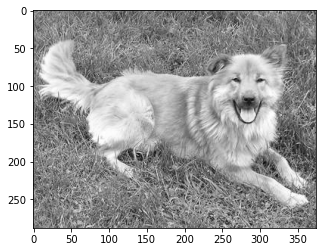

In [40]:
img_arr = read_img(img_path)
# Show the original image
show_img(img_arr)

k = 1


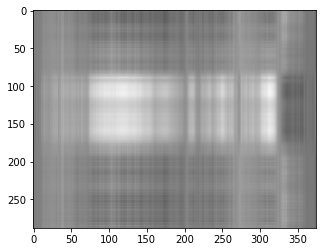

k = 6


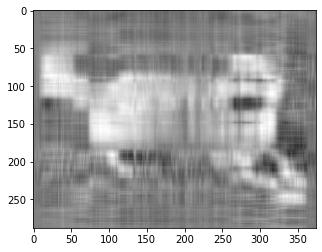

k = 11


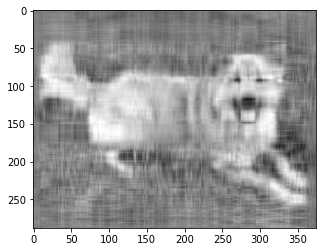

k = 16


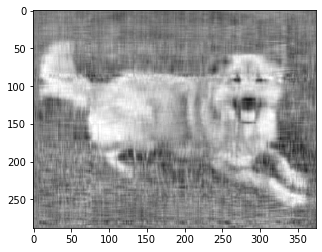

k = 21


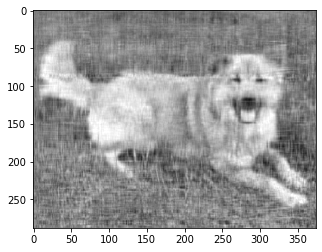

k = 26


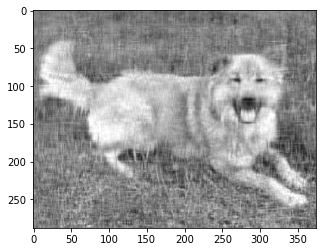

k = 31


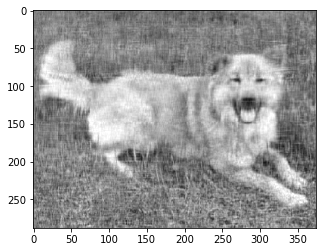

k = 36


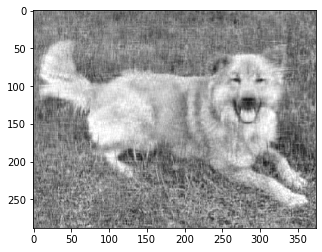

k = 41


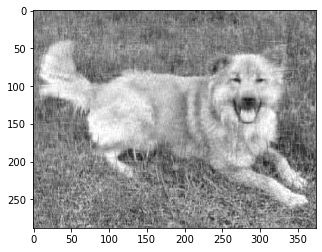

k = 46


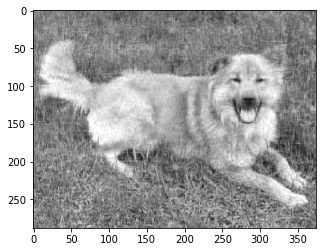

k = 51


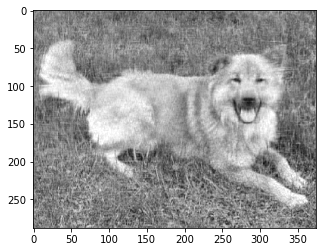

k = 56


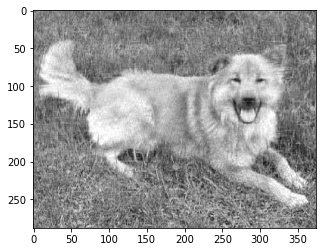

k = 61


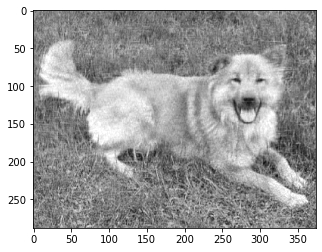

k = 66


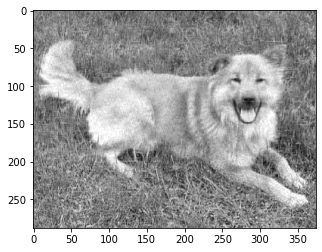

k = 71


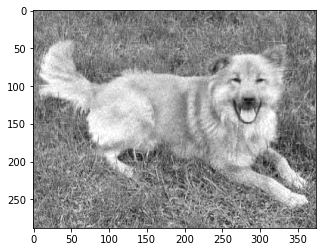

k = 76


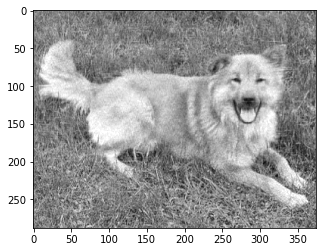

k = 81


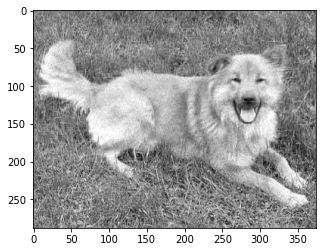

k = 86


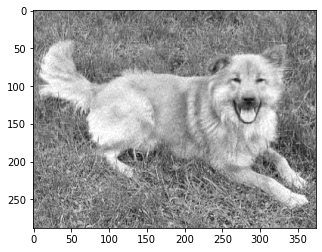

k = 91


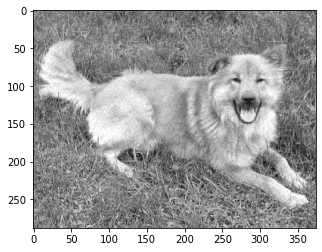

k = 96


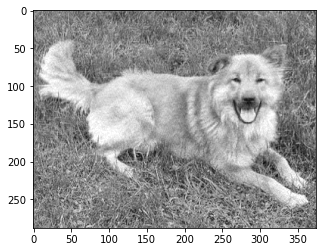

k = 101


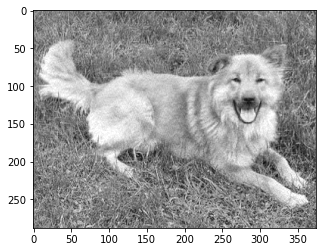

k = 106


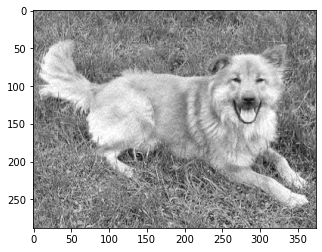

k = 111


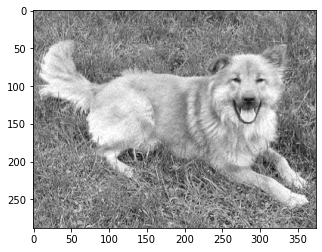

k = 116


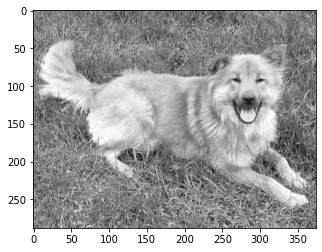

k = 121


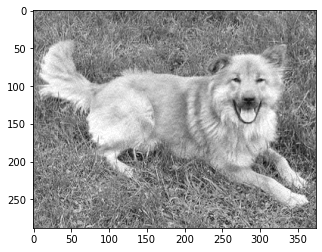

k = 126


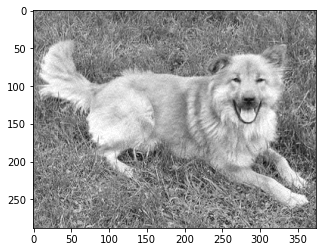

k = 131


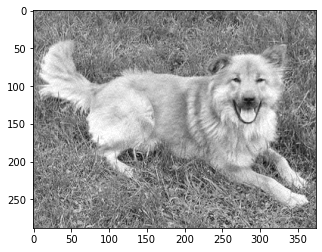

k = 136


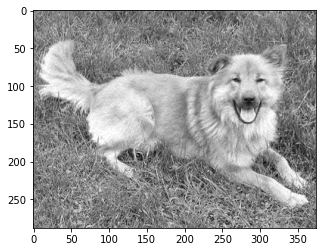

k = 141


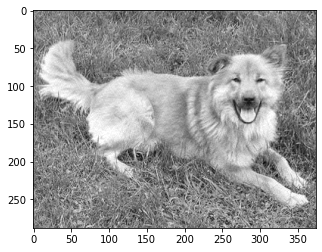

k = 146


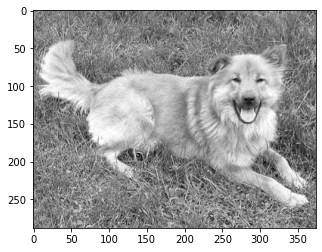

k = 151


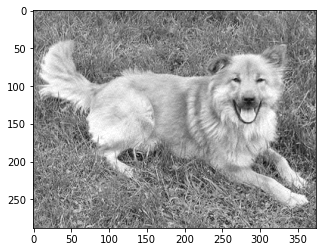

k = 156


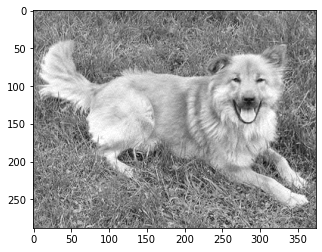

k = 161


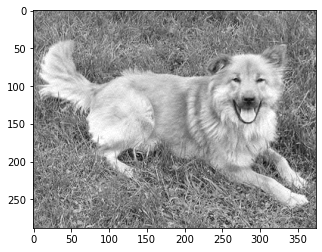

k = 166


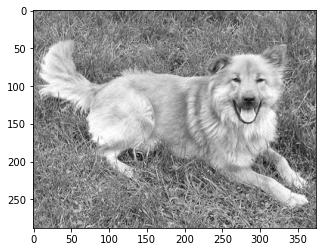

k = 171


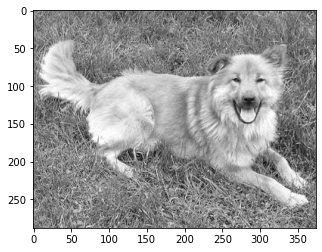

k = 176


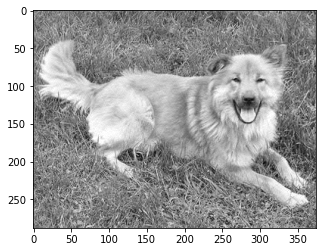

k = 181


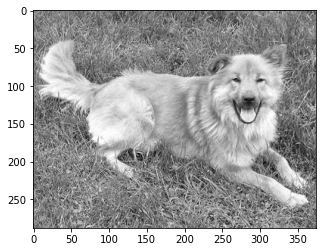

k = 186


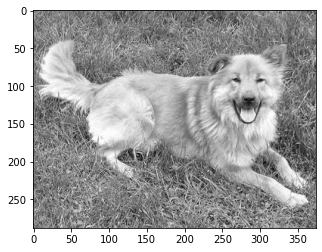

k = 191


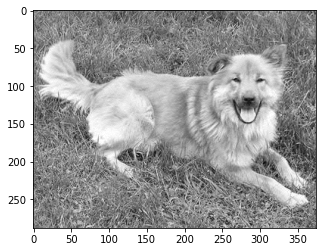

k = 196


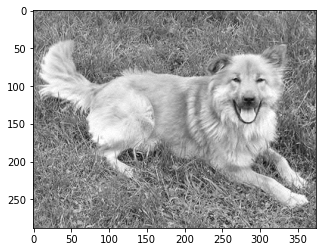

k = 201


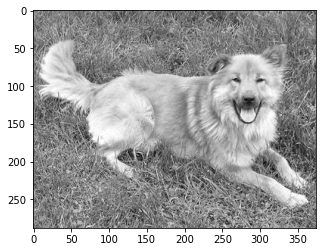

k = 206


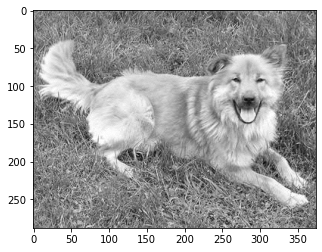

k = 211


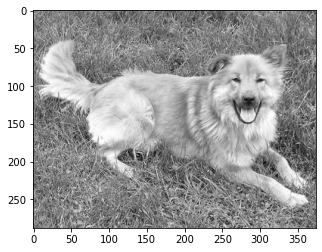

k = 216


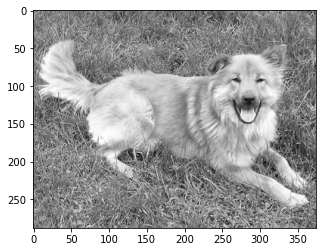

k = 221


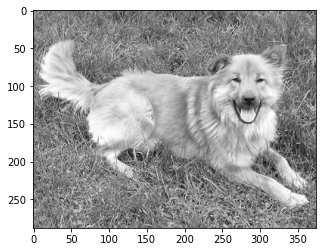

k = 226


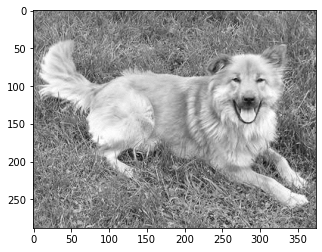

k = 231


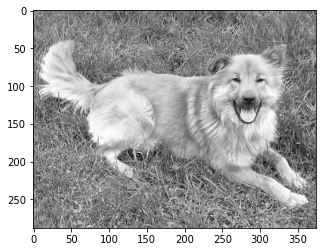

k = 236


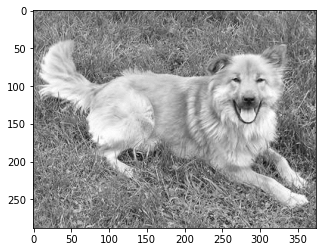

k = 241


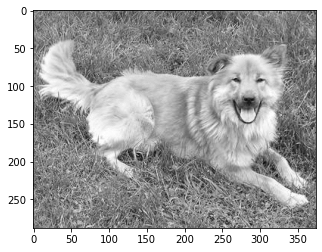

k = 246


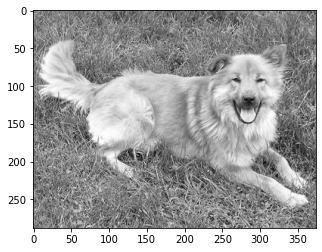

k = 251


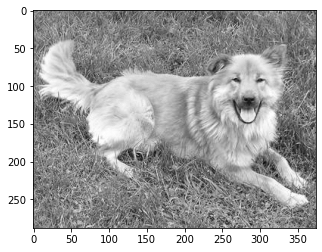

k = 256


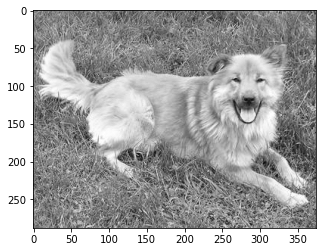

k = 261


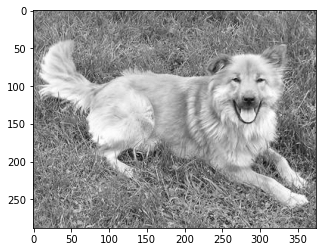

k = 266


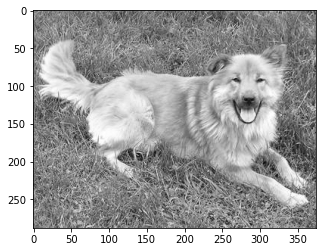

k = 271


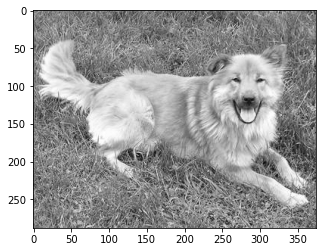

k = 276


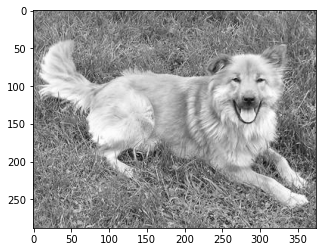

k = 281


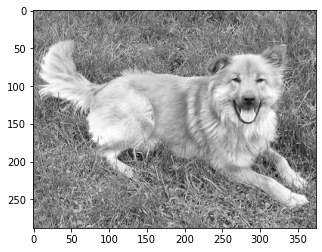

k = 286


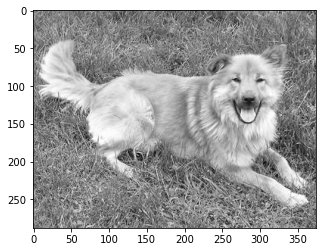

In [73]:
image_compress(img_arr)

# Audio Compression

In [64]:
def read_audio(path):    
    rate, data = read(path)
    audio_arr = np.array(data, dtype=float) 
    return audio_arr[:, 0], rate

In [20]:
def convert_audio_to_matrix(audio_arr, matrix_size):
    hanging = matrix_size - np.mod(len(audio_arr), matrix_size)
    padded = np.lib.pad(audio_arr, (0, hanging), 'constant', constant_values=0)
    audio_reshaped = padded.reshape((len(padded) // matrix_size, matrix_size))
    return audio_reshaped, len(padded), hanging

In [14]:
def save_audio(audio_save_path, filename, array, rate):
    path = os.path.join(audio_save_path, filename + '.wav')
    write(path, rate, array)

In [ ]:
def compress_sound(audio_arr):
    h, w = audio_arr.shape
    for k in range(1, min(h,w), 5):
        Xapprox = PCA(audio_arr, k)
        print(f'k = {k}')

In [76]:
audio_arr, rate = read_audio(audio_path)
audio_reshaped, padded_len, hanging  = convert_audio_to_matrix(audio_arr, 1024)
Xapprox = PCA(audio_reshaped, 200)
Xapprox = Xapprox.reshape((padded_len))
Xapprox = Xapprox[0:-hanging]
save_audio(audio_save_path, 'test', Xapprox, rate)